<a href="https://colab.research.google.com/github/Abdelrahman-Wael-1029/Supervised_assignments/blob/main/course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries for MNIST
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import cross_validate
import seaborn as sns

11490434/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


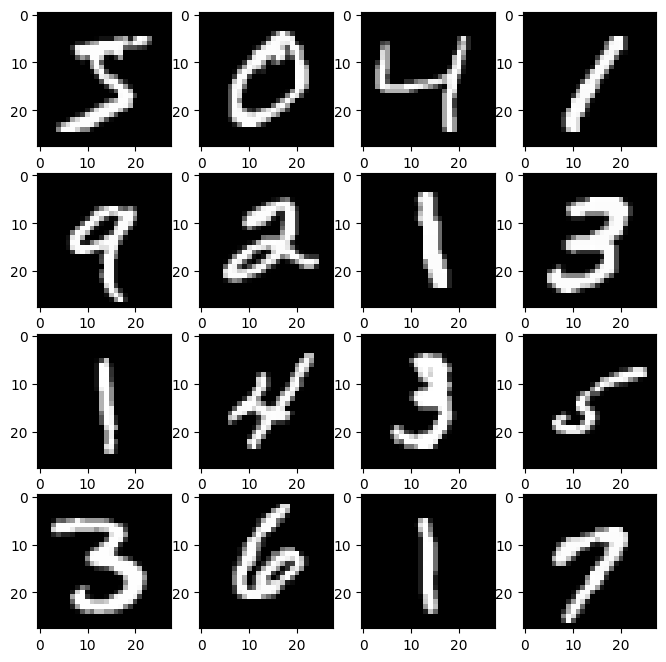

In [ ]:
# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Print the shapes of each dataset split
print(f"Train data shape: {train_X.shape}")
print(f"Test data shape: {test_X.shape}")

# Plotting
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
def extract_hog_features(images):
    features = []
    for image in images:
      fd = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2))
      features.append(fd)
    return np.array(features)

train_X_hog = extract_hog_features(train_X)
test_X_hog = extract_hog_features(test_X)
# Plotting
train_X_hog.shape

(60000, 1152)

In [ ]:
accuracies = {}

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_X_hog, train_y)

test_y_pred_knn = knn_classifier.predict(test_X_hog)
test_accuracy_knn = accuracy_score(test_y, test_y_pred_knn)
print(f"Test accuracy with KNN: {test_accuracy_knn}")
accuracies['knn'] = test_accuracy_knn

Test accuracy with KNN: 0.9749
[7 2 1 ... 4 5 6]


Axes(0.125,0.11;0.62x0.77)


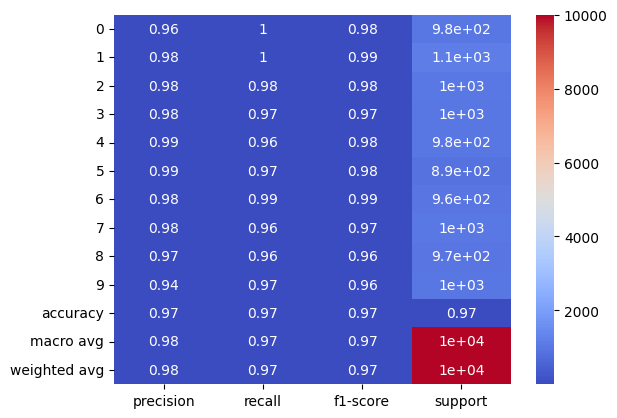

In [ ]:
report_KNN = classification_report(test_y, test_y_pred_knn, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_KNN).transpose(), annot=True, cmap = 'coolwarm'))

In [ ]:

rf = RandomForestClassifier(n_estimators=50)
rf.fit(train_X_hog, train_y)

test_y_pred_rf = rf.predict(test_X_hog)
test_accuracy_rf = accuracy_score(test_y, test_y_pred_rf)
print(f"Test accuracy with Random Forest: {test_accuracy_rf}")
accuracies['Random Forest'] = test_accuracy_rf


Test accuracy with Random Forest: 0.9747


Axes(0.125,0.11;0.62x0.77)


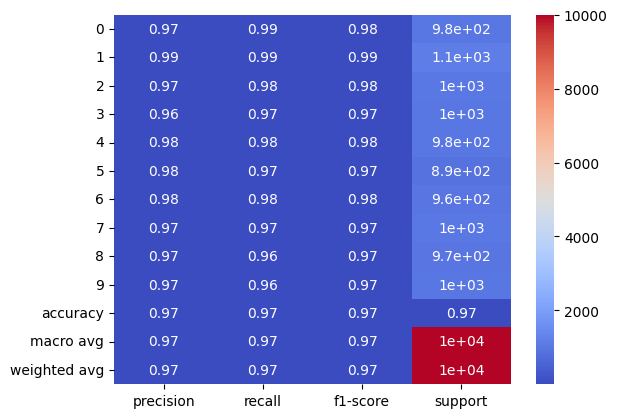

In [ ]:
report_RF = classification_report(test_y,test_y_pred_rf, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_RF).transpose(), annot=True, cmap = 'coolwarm'))

In [ ]:

dt = DecisionTreeClassifier()
dt.fit(train_X_hog, train_y)

test_y_pred_dt = dt.predict(test_X_hog)
test_accuracy_dt = accuracy_score(test_y, test_y_pred_dt)
print(f"Test accuracy with Decision Tree: {test_accuracy_dt}")
accuracies['Decision Tree'] = test_accuracy_dt


Test accuracy with Decision Tree: 0.8868


Axes(0.125,0.11;0.62x0.77)


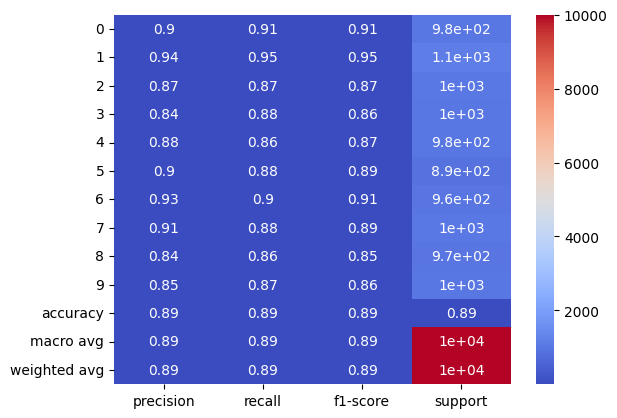

In [ ]:
report_DT = classification_report(test_y,test_y_pred_dt, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_DT).transpose(), annot=True, cmap = 'coolwarm'))

In [ ]:
gn = GaussianNB()
gn.fit(train_X_hog, train_y)

test_y_pred_gn = gn.predict(test_X_hog)
test_accuracy_gn = accuracy_score(test_y, test_y_pred_gn)
print(f"Test accuracy with naive bayes : {test_accuracy_gn}")
accuracies['naive bayes'] = test_accuracy_gn

Test accuracy with naive bayes : 0.8108


Axes(0.125,0.11;0.62x0.77)


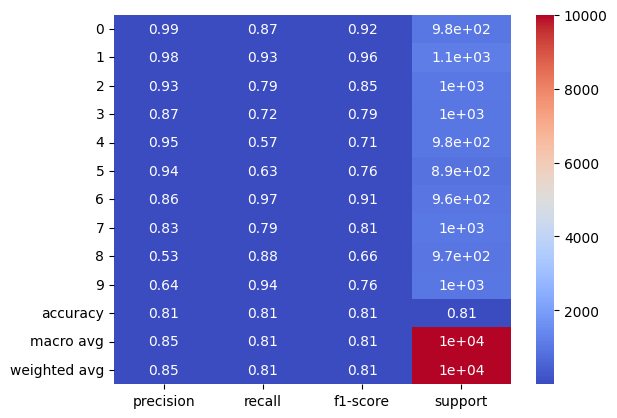

In [ ]:
report_GN = classification_report(test_y,test_y_pred_gn, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_GN).transpose(), annot=True, cmap = 'coolwarm'))

In [ ]:
lg = LogisticRegression()
lg.fit(train_X_hog, train_y)

test_y_pred_lg = lg.predict(test_X_hog)
test_accuracy_lg = accuracy_score(test_y, test_y_pred_lg)
print(f"Test accuracy with Logistic Regression: {test_accuracy_lg}")
accuracies['Logistic Regression'] = test_accuracy_lg


Test accuracy with Logistic Regression: 0.9815


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Axes(0.125,0.11;0.62x0.77)


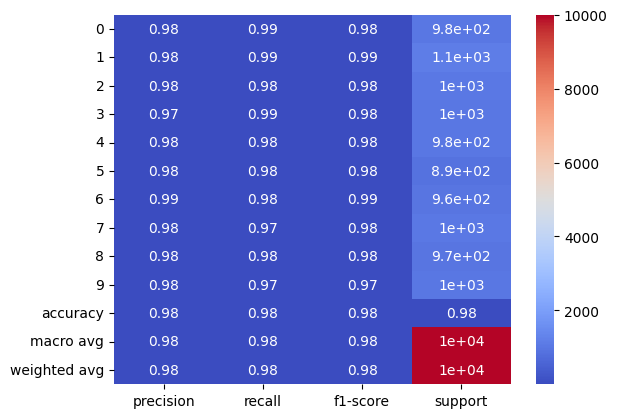

In [ ]:
report_lg = classification_report(test_y,test_y_pred_lg, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_lg).transpose(), annot=True, cmap = 'coolwarm'))

In [ ]:
print(accuracies)
res = [key for key in accuracies if all(accuracies[temp] <= accuracies[key] for temp in accuracies)]

print(f'The best algorithm is : {res}')

{'knn': 0.9749, 'Random Forest': 0.9747, 'Decision Tree': 0.8868, 'naive bayes': 0.8108, 'Logistic Regression': 0.9815}
The best algorithm is : ['Logistic Regression']


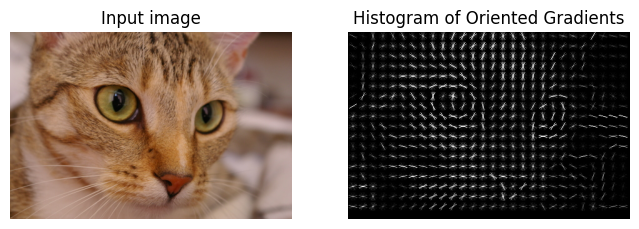

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.cat()


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

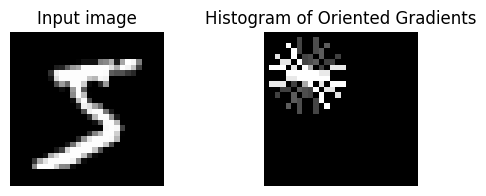

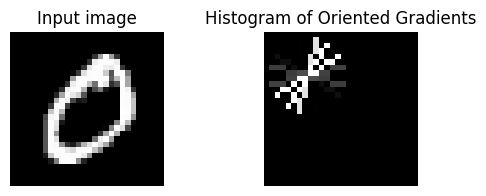

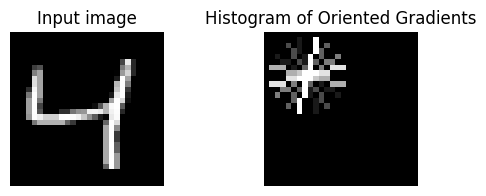

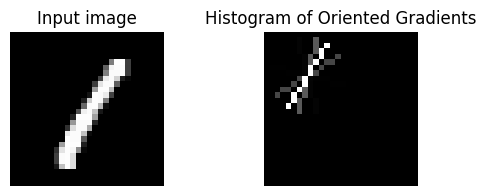

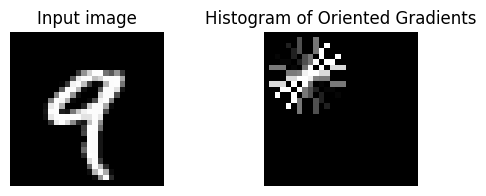

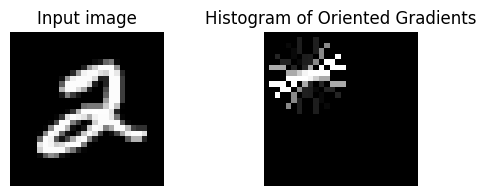

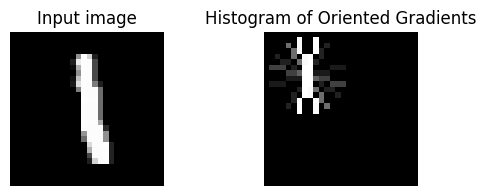

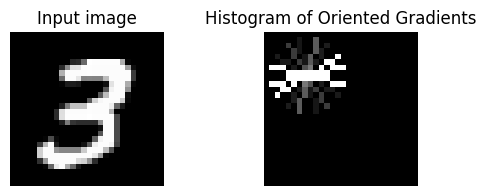

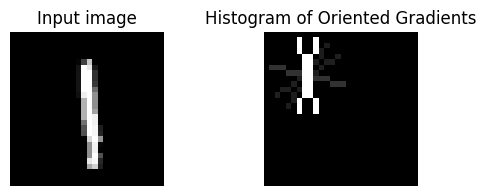

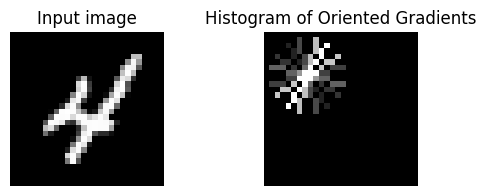

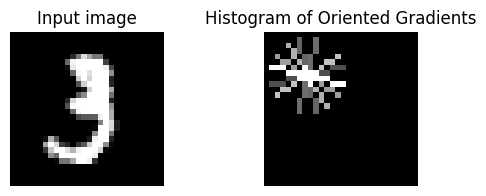

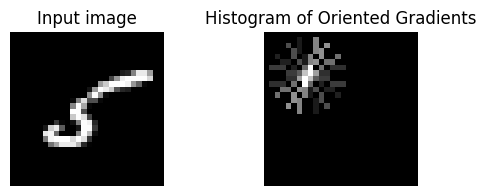

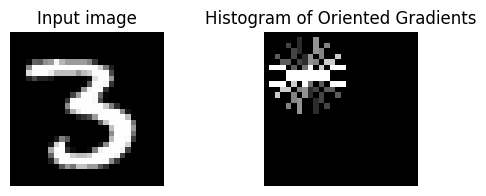

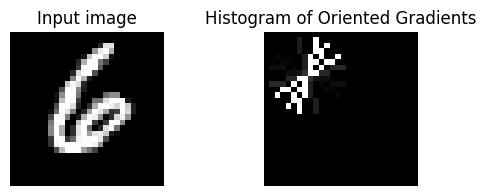

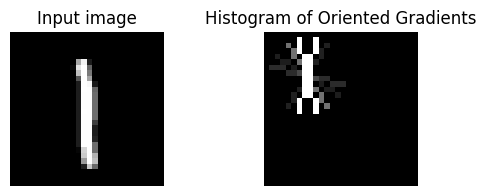

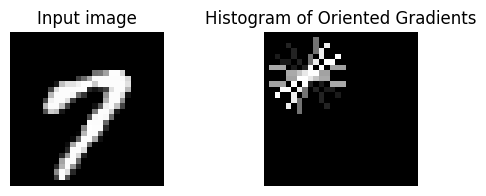

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

for i in range(16):
  image = train_X[i]

  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, )

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True)
  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()